# Analysis and Classification of Port dataset 

In [1]:
!python -V

Python 3.11.7


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
#stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create some toy data in a Pandas dataframe

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [4]:
def marco_micro(y_train, y_proba, y_test):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import RocCurveDisplay
    
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)
    y_onehot_test.shape  # (n_samples, n_classes)
    from sklearn.metrics import auc, roc_curve
    class_of_interest = "0"
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)
    class_id = 2
    class_id
    y_onehot_test[:, class_id], y_proba[:, class_id]
    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
    from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
    
    n_classes = len(np.unique(y_test))-48
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_grid = np.linspace(0.0, 1.0, 1000)
    
    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)
    
    for i in range(n_classes):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
    
    # Average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
    from itertools import cycle
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(n_classes), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_proba[:, class_id],
            name=f"ROC curve for {class_id}",
            color=color,
            ax=ax,
            #plot_chance_level=(class_id == 2),
        )
    
    _ = ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
    )

In [5]:
def fill(val):
    return '0'*(3-len(str(val))) + str(val)
    
def encode_variable (df, str_to_elimante):
    categorical_features = df.columns.tolist()
    for e in categorical_features:
        df[e]=df[e].astype(str)
    no_desc = df[df["NST2007"]==str_to_elimante].index
    print(no_desc)
    df = df.drop(index = no_desc, axis=1)
#     df = df.drop['harmonized_code']
    
    return df

In [6]:
def metircs (y_pred,y_test):
    predicted_actual = np.subtract(y_pred,y_test)==0
    predicted_actual.sum()
    # np.count_nonzero(predicted_actual == 0)
    # np.size(y_pred),np.size(y_test)
    # predicted_actual
    # np.size(predicted_actual) - np.count_nonzero(predicted_actual)+predicted_actual.sum()
    print('total test case:', np.size(y_test))
    print('total true case:', predicted_actual.sum())
    print('total False case:', np.size(predicted_actual) - np.count_nonzero(predicted_actual))
    print('Actual first 10 cases', y_test[0:10].values ) 
    print('Predicted first 10 cases', y_pred[0:10])
    print('Accuracy = {:.3f}' .format(accuracy_score(y_test,y_pred)))

In [ ]:
# Training and testing on june to Nov dataset (large dataset) 
# handling of large dataset with chunks 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.sparse import csr_matrix, hstack, vstack
import numpy as np
import joblib

# Define chunk size for reading the data
chunk_size = 100000

# Placeholder for the processed chunks
X_chunks = []
y_chunks = []

# Example column names
text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]
# Initialize transformers
tfidf_vectorizer = TfidfVectorizer()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = StandardScaler()

# Initialize LabelEncoder for the target column
target_label_encoder = LabelEncoder()

# First pass to fit transformers and gather unique values for label encoding
unique_categories = {col: set() for col in categorical_columns}
unique_targets = set()

# Track the numeric column order to ensure consistency
numeric_columns = None

for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    # chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    # chunk = chunk.set_index('Movement_Date')
    # chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    # chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk = chunk.drop(columns = ['Movement_Date',"Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Collect unique categories for categorical columns
    for col in categorical_columns:
        unique_categories[col].update(chunk[col].astype(str).unique())
    # Collect unique values for the target column
    chunk[target_column] = chunk[target_column].apply(fill)
    unique_targets.update(chunk[target_column].astype(str).unique())
    
    # Track numeric columns in the first chunk (we assume they don't change across chunks)
    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()

# Fit LabelEncoders on unique values
for col in categorical_columns:
    label_encoders[col].fit(list(unique_categories[col]))

# Fit LabelEncoder on the unique target values
target_label_encoder.fit(list(unique_targets))

# First pass to fit transformers for TfidfVectorizer and StandardScaler
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Ensure numeric columns are in float or int format and handle missing values
    chunk[numeric_columns] = chunk[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Fit TfidfVectorizer on text column
    tfidf_vectorizer.fit(chunk[text_column].astype(str))
    
    # Fit StandardScaler on numeric columns (use the consistent numeric_columns)
    scaler.partial_fit(chunk[numeric_columns])

# Second pass to transform data
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Ensure numeric columns are in float or int format and handle missing values
    # Ensure numeric columns are in float or int format and handle missing values
    
    chunk[numeric_columns] = chunk[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
        # Transform text column
    text_features = tfidf_vectorizer.transform(chunk[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        chunk[col] = label_encoders[col].transform(chunk[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.transform(chunk[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(chunk[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    chunk_features = hstack([text_features, categorical_numeric_features])
    
    # Append the sparse matrix to the list
    X_chunks.append(chunk_features)
    
    # Encode and store the target column
    # print(chunk[target_column].unique())
    # chunk[target_column] = chunk[target_column].astype('Int64')
    # print(chunk[target_column].unique())
    chunk[target_column] = chunk[target_column].apply(fill)
    # chunk[target_column] = pd.to_numeric(chunk[target_column], errors='coerce')
    # print(chunk[target_column].unique())
    # chunk[target_column]=chunk[target_column].mask(chunk[target_column]==18,118)
    # print(chunk[target_column].unique())
    y_transformed = target_label_encoder.transform(chunk[target_column].astype(str))
    y_chunks.append(y_transformed)

# Combine all chunks into a single sparse matrix
X_sparse = vstack(X_chunks)
y = np.concatenate(y_chunks)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Train a decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, 'decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_label_encoder, 'target_label_encoder.pkl')

# Evaluate the model
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=target_label_encoder.transform(['positive_label'])[0])
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


In [ ]:
# Test on december

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.sparse import csr_matrix, hstack
import joblib
import numpy as np

# Load the model and preprocessing objects
clf = joblib.load('decision_tree_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')
target_label_encoder = joblib.load('target_label_encoder.pkl')

text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

# Function to preprocess new data
def preprocess_new_data(df):
    # Track numeric columns (assuming they are the same as in training)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Ensure numeric columns are in float or int format and handle missing values
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    features = hstack([text_features, categorical_numeric_features])
    
    return features

# Load new dataset
# new_data = pd.read_csv('new_data.csv')
new_data = pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",")
new_data['Movement_Date'] = pd.to_datetime(new_data['Movement_Date'])
new_data = new_data.set_index('Movement_Date')
new_data = new_data.sort_index().loc['2023-12-01' : '2023-12-31', :] 
new_data = new_data.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
new_data.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
new_data.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
new_data['NST2007'] = new_data['NST2007'].apply(fill)
new_data = new_data.iloc[0:500]
# x_train, x_test , y_train, y_test = train_test_split(X.drop(columns = ["NST2007"], axis = 1),df['NST2007'],test_size=0.2,
#                                                      random_state=123, stratify = df['NST2007'])

y_true = target_label_encoder.transform(new_data['NST2007'].astype(str))
# new_data = new_data.drop(columns = ["NST2007"], axis = 1)
X_new = preprocess_new_data(new_data)

# Make predictions
y_pred_new = clf.predict(X_new)

# Inverse transform the target labels if needed
predicted_labels = target_label_encoder.inverse_transform(y_pred_new)

# Output predictions
# print(predicted_labels)

# If the new data has true labels, evaluate the model
if target_column in new_data.columns:
    y_true_new = target_label_encoder.transform(new_data[target_column].astype(str))
    
    # Calculate metrics
    accuracy = accuracy_score(y_true_new, y_pred_new)
    precision = precision_score(y_true_new, y_pred_new, average='macro')
    recall = recall_score(y_true_new, y_pred_new, average='macro')
    f1 = f1_score(y_true_new, y_pred_new, average='macro')

    # ROC curve and AUC
    # fpr, tpr, _ = roc_curve(y_true_new, clf.predict_proba(X_new)[:, 1], pos_label=target_label_encoder.transform(['positive_label'])[0])
    # roc_auc = auc(fpr, tpr)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    # print(f'ROC AUC: {roc_auc}')


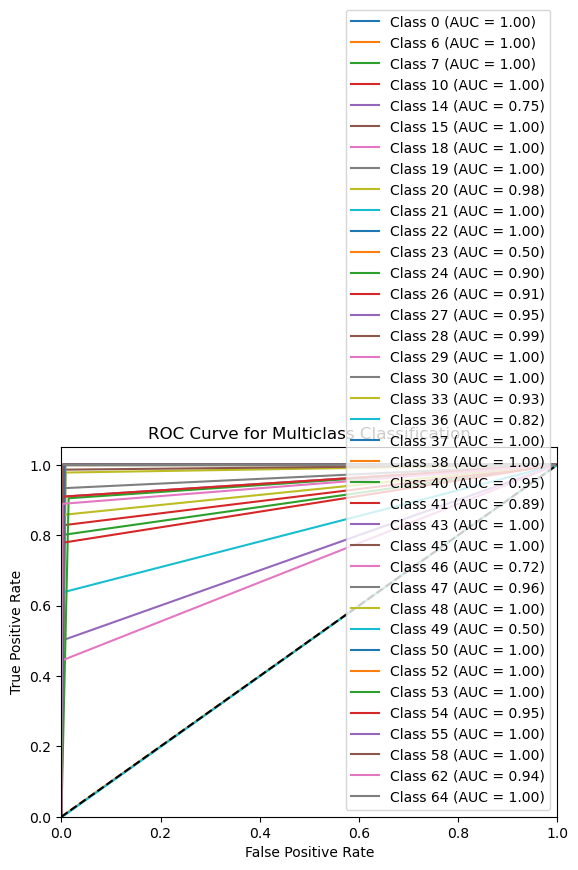

In [130]:
# Binarize the labels
from sklearn.preprocessing import label_binarize
import math

# y_true = X_new["NST2007"]

y_score = clf.predict_proba(X_new)

n_classes = y_score.shape[1]
y_true_binarized = label_binarize(y_true, classes=clf.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
nou = np.nan
for i in range(n_classes):
    # print(type(roc_auc[i]))
    if math.isnan(roc_auc[i]):
        pass
    else:
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [143]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.sparse import csr_matrix, hstack
import joblib

# Load the model and preprocessing objects
clf = joblib.load('decision_tree_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
scaler = joblib.load('scaler.pkl')
label_encoders = joblib.load('label_encoders.pkl')
target_label_encoder = joblib.load('target_label_encoder.pkl')

text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

# Function to preprocess new data
def preprocess_new_data(df):
    # Track numeric columns (assuming they are the same as in training)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Ensure numeric columns are in float or int format and handle missing values
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    features = hstack([text_features, categorical_numeric_features])
    
    return features

# Load new dataset
# new_data = pd.read_csv('new_data.csv')
new_data = pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",")
new_data['Movement_Date'] = pd.to_datetime(new_data['Movement_Date'])
new_data = new_data.set_index('Movement_Date')
new_data = new_data.sort_index().loc['2023-12-01' : '2023-12-31', :] 
new_data = new_data.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
new_data.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
new_data.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
new_data['NST2007'] = new_data['NST2007'].apply(fill)
# new_data = new_data.iloc[0:500]
x_train, x_test , y_train, y_test = train_test_split(new_data.drop(columns = ["NST2007"], axis = 1),new_data['NST2007'],test_size=0.2,
                                                     random_state=123, stratify = new_data['NST2007'])
new_data = x_train
y_true = y_train
y_true = target_label_encoder.transform(y_train.astype(str))
# new_data = new_data.drop(columns = ["NST2007"], axis = 1)
X_new = preprocess_new_data(new_data)

# Make predictions
y_pred_new = clf.predict(X_new)

# Inverse transform the target labels if needed
predicted_labels = target_label_encoder.inverse_transform(y_pred_new)

# Output predictions
# print(predicted_labels)
new_data['NST2007'] = y_train
# If the new data has true labels, evaluate the model
if target_column in new_data.columns:
    y_true_new = target_label_encoder.transform(new_data[target_column].astype(str))
    
    # Calculate metrics
    accuracy = accuracy_score(y_true_new, y_pred_new)
    precision = precision_score(y_true_new, y_pred_new, average='macro')
    recall = recall_score(y_true_new, y_pred_new, average='macro')
    f1 = f1_score(y_true_new, y_pred_new, average='macro')

    # ROC curve and AUC
    # fpr, tpr, _ = roc_curve(y_true_new, clf.predict_proba(X_new)[:, 1], pos_label=target_label_encoder.transform(['positive_label'])[0])
    # roc_auc = auc(fpr, tpr)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    # print(f'ROC AUC: {roc_auc}')


Accuracy: 0.7012383900928792
Precision: 0.5512946779957779
Recall: 0.5342280087848397
F1 Score: 0.5370887611103868


In [ ]:
#Feature selection
#large dataset june to nov 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.sparse import csr_matrix, hstack, vstack
import numpy as np
import joblib

# Define chunk size for reading the data
chunk_size = 10000

# Placeholder for the processed chunks
X_chunks = []
y_chunks = []

# Example column names
text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]
# Initialize transformers
tfidf_vectorizer = TfidfVectorizer()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = StandardScaler()

# Initialize LabelEncoder for the target column
target_label_encoder = LabelEncoder()

# First pass to fit transformers and gather unique values for label encoding
unique_categories = {col: set() for col in categorical_columns}
unique_targets = set()

# Track the numeric column order to ensure consistency
numeric_columns = None

for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    # chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    # chunk = chunk.set_index('Movement_Date')
    # chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    # chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk = chunk.drop(columns = ['Movement_Date',"Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Collect unique categories for categorical columns
    for col in categorical_columns:
        unique_categories[col].update(chunk[col].astype(str).unique())
    # Collect unique values for the target column
    chunk[target_column] = chunk[target_column].apply(fill)
    unique_targets.update(chunk[target_column].astype(str).unique())
    
    # Track numeric columns in the first chunk (we assume they don't change across chunks)
    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()

# Fit LabelEncoders on unique values
for col in categorical_columns:
    label_encoders[col].fit(list(unique_categories[col]))

# Fit LabelEncoder on the unique target values
target_label_encoder.fit(list(unique_targets))

# First pass to fit transformers for TfidfVectorizer and StandardScaler
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Ensure numeric columns are in float or int format and handle missing values
    chunk[numeric_columns] = chunk[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Fit TfidfVectorizer on text column
    tfidf_vectorizer.fit(chunk[text_column].astype(str))
    
    # Fit StandardScaler on numeric columns (use the consistent numeric_columns)
    scaler.partial_fit(chunk[numeric_columns])

# Second pass to transform data
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # Ensure numeric columns are in float or int format and handle missing values
    # Ensure numeric columns are in float or int format and handle missing values
    chunk[numeric_columns] = chunk[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(chunk[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        chunk[col] = label_encoders[col].transform(chunk[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.transform(chunk[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(chunk[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    chunk_features = hstack([text_features, categorical_numeric_features])
    
    # Append the sparse matrix to the list
    X_chunks.append(chunk_features)
    
    # Encode and store the target column
    # print(chunk[target_column].unique())
    # chunk[target_column] = chunk[target_column].astype('Int64')
    # print(chunk[target_column].unique())
    chunk[target_column] = chunk[target_column].apply(fill)
    # chunk[target_column] = pd.to_numeric(chunk[target_column], errors='coerce')
    # print(chunk[target_column].unique())
    # chunk[target_column]=chunk[target_column].mask(chunk[target_column]==18,118)
    # print(chunk[target_column].unique())
    y_transformed = target_label_encoder.transform(chunk[target_column].astype(str))
    y_chunks.append(y_transformed)

# Combine all chunks into a single sparse matrix
X_sparse = vstack(X_chunks)
y = np.concatenate(y_chunks)




In [20]:
first_10_percent, X_sparse, num_rows, type(y)
len(y), int(num_rows* 0.1)
yfirst_10_percent = y[:, int(num_rows* 0.1)]
len(yfirst_10_percent), int(num_rows* 0.1)

(74940, 74940)

In [24]:
# Select the first 10% of the data
num_rows = X_sparse.shape[0]
first_10_percent = X_sparse[:int(num_rows * 0.01), :]
y_taget =  y[: int(num_rows* 0.01)]
first_10_percent, len(y_taget)

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 123602 stored elements and shape (7494, 4301)>,
 7494)

In [ ]:
###################### Feature selection #################################################################

In [ ]:
###################### Feature selection #################################################################
#df_classif = train_test_data 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
sample_df = first_10_percent#.sample(frac=1, random_state=42)  # 10% of data
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50,
                                        criterion ='entropy', max_features = 1000)
# x_train = df.drop(columns = ['NST2007'], axis = 0)
extra_tree_forest.fit(sample_df, y_taget)
# df_train = df_train.drop(columns = ['NST2007'], axis = 1))



# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# feature_importance_df = pd.DataFrame({'feature': df.columns[:target_variable_index], 'importance': feature_importances})
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
len(feature_importance_normalized)
feat_importances = pd.Series(extra_tree_forest.feature_importances_,index=sample_df.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()
sample_df = df[feat_importances.nlargest(1000).index]

In [ ]:
#Model training and saving for june to novmber after future selection

In [ ]:
# Combine all chunks into a single sparse matrix
X_sparse = vstack(X_chunks)
y = np.concatenate(y_chunks)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Train a decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

joblib.dump(clf, 'Feture_decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'Feture_tfidf_vectorizer.pkl')
joblib.dump(scaler, 'Feture_scaler.pkl')
joblib.dump(label_encoders, 'Feture_label_encoders.pkl')
joblib.dump(target_label_encoder, 'Feture_target_label_encoder.pkl')

# Evaluate the model
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1], pos_label=target_label_encoder.transform(['positive_label'])[0])
roc_auc = auc(fpr, tpr)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


In [ ]:
##################### Testing on december after feature selection 10000 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from scipy.sparse import csr_matrix, hstack
import joblib

# Load the model and preprocessing objects
clf = joblib.load('Feture_decision_tree_model.pkl')
tfidf_vectorizer = joblib.load('Feture_tfidf_vectorizer.pkl')
scaler = joblib.load('Feture_scaler.pkl')
label_encoders = joblib.load('Feture_label_encoders.pkl')
target_label_encoder = joblib.load('Feture_target_label_encoder.pkl')

text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

# Function to preprocess new data
def preprocess_new_data(df):
    # Track numeric columns (assuming they are the same as in training)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Ensure numeric columns are in float or int format and handle missing values
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    features = hstack([text_features, categorical_numeric_features])
    
    return features

# Load new dataset
# new_data = pd.read_csv('new_data.csv')
new_data = pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",")
new_data['Movement_Date'] = pd.to_datetime(new_data['Movement_Date'])
new_data = new_data.set_index('Movement_Date')
new_data = new_data.sort_index().loc['2023-12-01' : '2023-12-31', :] 
new_data = new_data.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
new_data.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
new_data.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
new_data['NST2007'] = new_data['NST2007'].apply(fill)
# new_data = new_data.iloc[0:500]
x_train, x_test , y_train, y_test = train_test_split(new_data.drop(columns = ["NST2007"], axis = 1),new_data['NST2007'],test_size=0.2,
                                                     random_state=123, stratify = new_data['NST2007'])
new_data = x_train
y_true = y_train
y_true = target_label_encoder.transform(y_train.astype(str))
# new_data = new_data.drop(columns = ["NST2007"], axis = 1)
X_new = preprocess_new_data(new_data)

# Make predictions
y_pred_new = clf.predict(X_new)

# Inverse transform the target labels if needed
predicted_labels = target_label_encoder.inverse_transform(y_pred_new)

# Output predictions
# print(predicted_labels)
new_data['NST2007'] = y_train
# If the new data has true labels, evaluate the model
if target_column in new_data.columns:
    y_true_new = target_label_encoder.transform(new_data[target_column].astype(str))
    
    # Calculate metrics
    accuracy = accuracy_score(y_true_new, y_pred_new)
    precision = precision_score(y_true_new, y_pred_new, average='macro')
    recall = recall_score(y_true_new, y_pred_new, average='macro')
    f1 = f1_score(y_true_new, y_pred_new, average='macro')

    # ROC curve and AUC
    # fpr, tpr, _ = roc_curve(y_true_new, clf.predict_proba(X_new)[:, 1], pos_label=target_label_encoder.transform(['positive_label'])[0])
    # roc_auc = auc(fpr, tpr)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    # print(f'ROC AUC: {roc_auc}')


In [ ]:
##### feature selection with "SelectKBest"

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.sparse import hstack, csr_matrix, vstack
import joblib

# Function to preprocess data
def preprocess_data(df, tfidf_vectorizer, label_encoders, scaler, feature_selector, is_train=True):
    # df1 = df['NST2007']
    # df = df.drop(columns = ["NST2007"], axis = 1)
    text_column = 'Descrição_Carga'  # Text column
    categorical_columns = ['Container_Plate',
     'Message',
     'Embarkation_Port',
     'Disembarkation_Port',
     'Transhipment',
     'ISO_contentainer',
     'ISO_contentainer_Registry',
     'Container_State']  # Categorical columns
    target_column = 'NST2007'  # Target column
    numeric_columns = ['Container_Tare',
     'Weight',
     'Broken_Packages_Quantity',
     'Packages_Quantity',
     'Departure_Weight',
     ]

    # Ensure numeric columns are in float or int format and handle missing values
    # numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str))
    
    # Transform categorical columns
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.fit(df[numeric_columns])
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    features = hstack([text_features, categorical_numeric_features])
    
    if is_train:
        features = feature_selector.fit_transform(features, df[target_column])
    else:
        features = feature_selector.transform(features)
    
    # from scipy import sparse
    # features = sparse.lil_matrix(sparse.csr_matrix(features)[:,'NST2007'])
    return features, df[target_column]

# Load the dataset in chunks
chunk_size = 10000
text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

# Initialize transformers and classifiers
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = StandardScaler()
####################   SelectKBest ###########################################
#feature_selector = ExtraTreesClassifier(n_estimators=100)
####################   SelectKBest ###########################################
feature_selector = SelectKBest(score_func=chi2, k=1000)
#clf = DecisionTreeClassifier(random_state=42)
from sklearn.ensemble import RandomForestClassifier
import joblib
clf = RandomForestClassifier(max_depth=60)
# Placeholder for processed chunks
X_chunks = []
y_chunks = []

# Fit transformers and collect unique values for label encoding
unique_categories = {col: set() for col in categorical_columns}
unique_targets = set()

for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-12-31', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # chunk = chunk.drop(columns = ["NST2007"], axis = 1)
    chunk['NST2007'] = chunk['NST2007'].apply(fill)
    for col in categorical_columns:
        unique_categories[col].update(chunk[col].astype(str).unique())
    unique_targets.update(chunk[target_column].astype(str).unique())
    
    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()
    # break
for col in categorical_columns:
    label_encoders[col].fit(list(unique_categories[col]))

target_label_encoder = LabelEncoder()
target_label_encoder.fit(list(unique_targets))

# Process chunks and combine
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    chunk['NST2007'] = chunk['NST2007'].apply(fill)

    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()
    
    # Fit the TF-IDF on the first chunk only
    if len(X_chunks) == 0:
        tfidf_vectorizer.fit(chunk[text_column].astype(str))
    
    chunk_features, chunk_target = preprocess_data(chunk, tfidf_vectorizer, label_encoders, scaler, feature_selector)
    X_chunks.append(chunk_features)
    y_chunks.append(target_label_encoder.transform(chunk_target))
    # break
X_sparse = vstack(X_chunks)
y = np.concatenate(y_chunks)

X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

# Save the model and preprocessing objects
joblib.dump(clf, 'Feture_decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'Feture_tfidf_vectorizer.pkl')
joblib.dump(scaler, 'Feture_scaler.pkl')
joblib.dump(label_encoders, 'Feture_label_encoders.pkl')
joblib.dump(target_label_encoder, 'Feture_target_label_encoder.pkl')
joblib.dump(feature_selector, 'Feture_feature_selector.pkl')
joblib.dump(important_features, 'Feture_important_features.pkl')

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# print(f'ROC AUC: {roc_auc}')


Accuracy: 0.9439288502211755
Precision: 0.9734880473002088
Recall: 0.9283960713625995
F1 Score: 0.9486069814559268


In [ ]:
############################# Feature selection extratree classifier #################################

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from scipy.sparse import hstack, csr_matrix, vstack
import joblib
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score

def fill(val):
    return '0'*(3-len(str(val))) + str(val)

# Function to preprocess data
def preprocess_data(df, tfidf_vectorizer, label_encoders, scaler, feature_selector, is_train=True):
    # df1 = df['NST2007']
    # df = df.drop(columns = ["NST2007"], axis = 1)
    text_column = 'Descrição_Carga'  # Text column
    categorical_columns = ['Container_Plate',
     'Message',
     'Embarkation_Port',
     'Disembarkation_Port',
     'Transhipment',
     'ISO_contentainer',
     'ISO_contentainer_Registry',
     'Container_State']  # Categorical columns
    target_column = 'NST2007'  # Target column
    numeric_columns = ['Container_Tare',
     'Weight',
     'Broken_Packages_Quantity',
     'Packages_Quantity',
     'Departure_Weight',
     ]

    # Ensure numeric columns are in float or int format and handle missing values
    # numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # Transform text column
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str), min_df=1)
    
    # Transform categorical columns
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    # Transform numeric columns
    numeric_features = scaler.fit(df[numeric_columns])
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    # Combine categorical and numeric features into a sparse matrix
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    # Combine text features with categorical and numeric features
    features = hstack([text_features, categorical_numeric_features])
    
    if is_train:
        return features, df[target_column]
    else:
        # Select only the features used during training
        return features[:, feature_indices]
    
    # from scipy import sparse
    # features = sparse.lil_matrix(sparse.csr_matrix(features)[:,'NST2007'])
    # return features, df[target_column]

# Load the dataset in chunks
chunk_size = 10000
text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

# Initialize transformers and classifiers
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
label_encoders = {col: LabelEncoder() for col in categorical_columns}
scaler = StandardScaler()
####################   ExtraTreesClassifier ###########################################
feature_selector = ExtraTreesClassifier(n_estimators=100)
####################   SelectKBest ###########################################
#feature_selector = SelectKBest(score_func=chi2, k=3000)
clf = DecisionTreeClassifier(random_state=42)

# Placeholder for processed chunks
X_chunks = []
y_chunks = []

# Fit transformers and collect unique values for label encoding
unique_categories = {col: set() for col in categorical_columns}
unique_targets = set()

for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-12-31', :] 
    chunk = chunk.reset_index()
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    # chunk = chunk.drop(columns = ["NST2007"], axis = 1)
    chunk['NST2007'] = chunk['NST2007'].apply(fill)
    str_to_elimante = '000'
    no_desc = chunk[chunk["NST2007"]==str_to_elimante].index
    # print(no_desc)
    chunk = chunk.drop(index = no_desc, axis=1)
    chunk = chunk.drop_duplicates()

    for col in categorical_columns:
        unique_categories[col].update(chunk[col].astype(str).unique())
    unique_targets.update(chunk[target_column].astype(str).unique())
    
    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()
    # break
for col in categorical_columns:
    label_encoders[col].fit(list(unique_categories[col]))

target_label_encoder = LabelEncoder()
target_label_encoder.fit(list(unique_targets))

# Process chunks and combine
for chunk in pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",", chunksize=chunk_size):
    chunk['Movement_Date'] = pd.to_datetime(chunk['Movement_Date'])
    chunk = chunk.set_index('Movement_Date')
    chunk = chunk.sort_index().loc['2023-06-01' : '2023-11-30', :] 
    chunk = chunk.reset_index()
    chunk = chunk.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
    chunk.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
    chunk.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
    chunk['NST2007'] = chunk['NST2007'].apply(fill)
    str_to_elimante = '000'
    no_desc = chunk[chunk["NST2007"]==str_to_elimante].index
    # print(no_desc)
    chunk = chunk.drop(index = no_desc, axis=1)
    chunk = chunk.drop_duplicates()


    if numeric_columns is None:
        numeric_columns = chunk.select_dtypes(include=[np.number]).columns.tolist()
    
    # Fit the TF-IDF on the first chunk only
    if len(X_chunks) == 0:
        tfidf_vectorizer.fit(chunk[text_column].astype(str), min_df=1)
    
    chunk_features, chunk_target = preprocess_data(chunk, tfidf_vectorizer, label_encoders, scaler, feature_selector)
    X_chunks.append(chunk_features)
    y_chunks.append(target_label_encoder.transform(chunk_target))
    # break
X_sparse = vstack(X_chunks)
y = np.concatenate(y_chunks)

############## First 10% of cases ########################
X_sparse1 = X_sparse[0:7494, :]
y1 = y[0:7494]

# Feature selection using Extra Trees
# feature_selector = ExtraTreesClassifier(n_estimators=100)
# feature_selector.fit(X_sparse1, y1)
# important_features = np.argsort(feature_selector.feature_importances_)[-2000:]  # Select top 1000 features

# Feature selection using Decision Tree
feature_selector = SelectFromModel(DecisionTreeClassifier(random_state=42), max_features=1000)
feature_selector.fit(X_sparse1, y1)
important_features = feature_selector.get_support(indices=True)

X_selected = X_sparse1[:, important_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
# Save the model and preprocessing objects
joblib.dump(clf, 'Feture_decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'Feture_tfidf_vectorizer.pkl')
joblib.dump(scaler, 'Feture_scaler.pkl')
joblib.dump(label_encoders, 'Feture_label_encoders.pkl')
joblib.dump(target_label_encoder, 'Feture_target_label_encoder.pkl')
joblib.dump(feature_selector, 'Feture_feature_selector.pkl')
joblib.dump(important_features, 'Feture_important_features.pkl')


# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# print(f'ROC AUC: {roc_auc}')


In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score

X_sparse1 = X_sparse[0:74940, :]
y1 = y[0:74940]

# Feature selection using Extra Trees
# feature_selector = ExtraTreesClassifier(n_estimators=100)
# feature_selector.fit(X_sparse1, y1)
# important_features = np.argsort(feature_selector.feature_importances_)[-2000:]  # Select top 1000 features

# Feature selection using Decision Tree
feature_selector = SelectFromModel(DecisionTreeClassifier(random_state=42))
feature_selector.fit(X_sparse1, y1)
important_features = feature_selector.get_support(indices=True)

X_selected = X_sparse1[:, important_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size=0.2, random_state=42)
# Cross-validation to evaluate the model's performance
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores)}')
clf.fit(X_train, y_train)
# Save the model and preprocessing objects
joblib.dump(clf, 'Feture_decision_tree_model.pkl')
joblib.dump(tfidf_vectorizer, 'Feture_tfidf_vectorizer.pkl')
joblib.dump(scaler, 'Feture_scaler.pkl')
joblib.dump(label_encoders, 'Feture_label_encoders.pkl')
joblib.dump(target_label_encoder, 'Feture_target_label_encoder.pkl')
joblib.dump(feature_selector, 'Feture_feature_selector.pkl')
joblib.dump(important_features, 'important_features.pkl')
# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
# print(f'ROC AUC: {roc_auc}')


C:\Users\u236236\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation accuracy scores: [0.99316154 0.99157702 0.99257715 0.99232694 0.99232694]
Mean cross-validation accuracy: 0.9923939159540632
Accuracy: 0.9954630370963438
Precision: 0.9504047814973837
Recall: 0.9879606042838445
F1 Score: 0.9666859936415191


In [ ]:
################## Testing after feature selection

In [ ]:
import pandas as pd
from scipy.sparse import hstack, csr_matrix
import joblib

def fill(val):
    return '0'*(3-len(str(val))) + str(val)

# Load the model and preprocessing objects
clf = joblib.load('Feture_decision_tree_model.pkl')
tfidf_vectorizer = joblib.load('Feture_tfidf_vectorizer.pkl')
scaler = joblib.load('Feture_scaler.pkl')
label_encoders = joblib.load('Feture_label_encoders.pkl')
target_label_encoder = joblib.load('Feture_target_label_encoder.pkl')
feature_selector = joblib.load('Feture_feature_selector.pkl')
important_features = joblib.load('important_features.pkl')

# Example column names
text_column = 'Descrição_Carga'  # Text column
categorical_columns = ['Container_Plate',
 'Message',
 'Embarkation_Port',
 'Disembarkation_Port',
 'Transhipment',
 'ISO_contentainer',
 'ISO_contentainer_Registry',
 'Container_State']  # Categorical columns
target_column = 'NST2007'  # Target column
numeric_columns = ['Container_Tare',
 'Weight',
 'Broken_Packages_Quantity',
 'Packages_Quantity',
 'Departure_Weight',
 ]

def preprocess_new_data(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    
    text_features = tfidf_vectorizer.transform(df[text_column].astype(str))
    
    for col in categorical_columns:
        df[col] = label_encoders[col].transform(df[col].astype(str))
    
    numeric_features = scaler.transform(df[numeric_columns])
    numeric_features_sparse = csr_matrix(numeric_features)
    
    categorical_numeric_features = csr_matrix(df[categorical_columns + numeric_columns].values)
    
    features = hstack([text_features, categorical_numeric_features])
    # features = feature_selector.transform(features)
    features = features[:, important_features]
    return features

new_data = pd.read_csv(r"D:\Averio\NEXUS_project\Dataset\Caso de estudo 1 _ classification\Jun_Dec_2023_with_Date (1).csv", encoding="UTF-8", delimiter=",")
new_data['Movement_Date'] = pd.to_datetime(new_data['Movement_Date'])
new_data = new_data.set_index('Movement_Date')
new_data = new_data.sort_index().loc['2023-12-01' : '2023-12-31', :] 
new_data = new_data.drop(columns = ["Harmonized_Code", "CN2007_8P_Label_EN", 'NST2007_3P_Label_EN', 'NST2007_2P', 'NST2007_2P_Label_EN'], axis = 1)
new_data.rename(columns = {'NST2007_3P':'NST2007'}, inplace = True)
new_data.rename(columns = {'Cargo_Description':'Descrição_Carga'}, inplace = True)    # Collect unique categories for categorical columns
new_data['NST2007'] = new_data['NST2007'].apply(fill)
X_new = preprocess_new_data(new_data)
X_new = X_new[important_features]
y_pred_new = clf.predict(X_new)
predicted_labels = target_label_encoder.inverse_transform(y_pred_new)

# print(predicted_labels)

# If the target column exists in the new data, evaluate the model
if target_column in new_data.columns:
    y_true_new = target_label_encoder.transform(new_data[target_column].astype(str))
    
    accuracy = accuracy_score(y_true_new, y_pred_new)
    precision = precision_score(y_true_new, y_pred_new, average='macro')
    recall = recall_score(y_true_new, y_pred_new, average='macro')
    f1 = f1_score(y_true_new, y_pred_new, average='macro')
    roc_auc = roc_auc_score(y_true_new, clf.predict_proba(X_new), multi_class='ovo')
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC: {roc_auc}')


# Feature selection methods

In [ ]:
#df_classif = train_test_data 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
sample_df = df.sample(frac=0.1, random_state=42)  # 10% of data
extra_tree_forest = ExtraTreesClassifier(n_estimators = 50,
                                        criterion ='entropy', max_features = 1000)
# x_train = df.drop(columns = ['NST2007'], axis = 0)
extra_tree_forest.fit(sample_df.drop(columns = ['NST2007'], axis = 0) , sample_df['NST2007'])
# df_train = df_train.drop(columns = ['NST2007'], axis = 1))
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
len(feature_importance_normalized)
feat_importances = pd.Series(extra_tree_forest.feature_importances_,index=sample_df.drop(columns = ['NST2007'], axis = 0).columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()
sample_df = df[feat_importances.nlargest(1000).index]


In [ ]:
## **5- ExtraTreesRegressor (Classification)**

# incremental learning

In [ ]:
from river import tree
from river import stream
from river import metrics

# Create a Hoeffding Tree classifier
model = tree.HoeffdingTreeClassifier()

# Simulate a stream from the first dataset
dataset1 = stream.iter_pandas(sample_df, df['NST2007'])

# Train incrementally on the first dataset
metric = metrics.Accuracy()
for x, y in dataset1:
    y_pred = model.predict_one(x)
    metric = metric.update(y, y_pred)
    model.learn_one(x, y)
print(f"Accuracy after the first dataset: {metric}")

In [ ]:
# Simulate a stream from the second dataset
dataset2 = stream.iter_pandas(X2, y2)

# Continue training incrementally on the second dataset
for x, y in dataset2:
    y_pred = model.predict_one(x)
    metric = metric.update(y, y_pred)
    model.learn_one(x, y)
print(f"Accuracy after the second dataset: {metric}")

In [74]:
y_sample= df['NST2007']
# df_train = sample_df
X_train, X_test, y_train, y_test = train_test_split(sample_df, y_sample,test_size=0.28,random_state=50, stratify=y_sample)
x_train=x_train.astype(int)
x_test=x_test.astype(int)

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
# y_sample.shape[1]
print(Y_train.nunique(),y_test.nunique())

(63009, 1000) (63009,)
(24504, 1000) (24504,)
64 64


In [ ]:
############# with LSTM 

In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D,Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D


In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(len(word_index)+1, 100, input_length=sample_df.shape[1]))
model_cnn.add(SpatialDropout1D(0.2))

model_cnn.add(Conv1D(100, 3, padding='valid', activation='relu', strides=1))
model_cnn.add(GlobalMaxPool1D())

model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(3, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_cnn.summary())

Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 436s 14s/step - accuracy: 0.0390 - loss: 4.0523 - val_accuracy: 0.1687 - val_loss: 3.3810
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 352s 11s/step - accuracy: 0.1671 - loss: 3.3333 - val_accuracy: 0.1687 - val_loss: 3.2516
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 397s 13s/step - accuracy: 0.1679 - loss: 3.2517 - val_accuracy: 0.1687 - val_loss: 3.2435


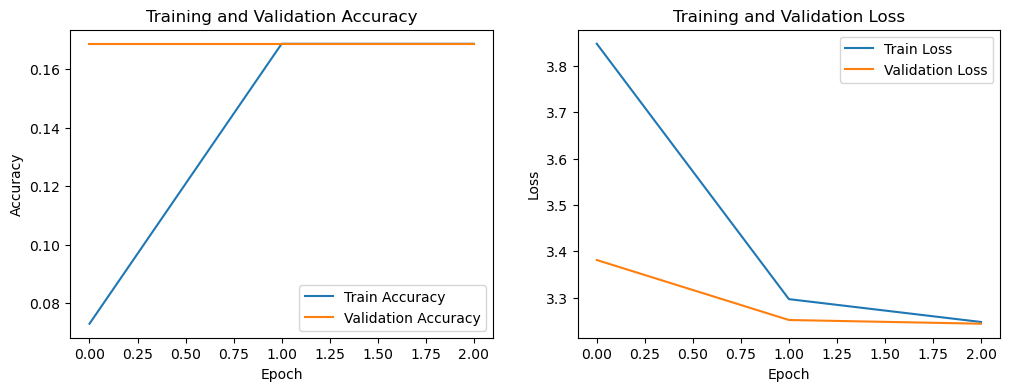

766/766 ━━━━━━━━━━━━━━━━━━━━ 155s 201ms/step
Test Accuracy: 16.87%
Test Precision: 0.0285
Test Recall: 0.1687


In [75]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, GlobalAveragePooling1D, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and preprocessed your data
# Replace X_train, X_test, y_train, y_test with your actual data

# Reshape the input data for the LSTM-FCN model
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# Encode the categorical target variable
le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

# Build the LSTM-FCN model for multi-class classification
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for three epochs
history = model.fit(X_train, y_train_encoded, epochs=3, batch_size=2048, validation_data=(X_test, y_test_encoded))

# Save the trained model
model.save('lstm_fcn_model.h5')

# Plot training history (optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Calculate and print accuracy, precision, and recall
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')


In [ ]:
# Variance threshold

In [28]:
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object to perform variance thresholding

selector = VarianceThreshold(threshold=0.00001)
sample_df = df.sample(frac=0.1, random_state=42)  # 10% of data

# Transform the dataset according to variance thresholding
X_data_new = selector.fit_transform(sample_df)

# Print the results
print('Number of features before variance thresholding: {}'.format(sample_df.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))
# var_thres=VarianceThreshold(threshold=25)
# var_thres.fit(df)
# selector.get_support()
# sample_df.columns[selector.get_support()]
selector.get_support()
sa = sample_df.columns[selector.get_support()]
len(sa)
df_train = df[sa]
df_train

Number of features before variance thresholding: 36075
Number of features after variance thresholding: 127


# Kfold cross valadation and hyper parameter tuning decision tree

In [34]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Load dataset
# Define the classifier
classifier = DecisionTreeClassifier(random_state=42)
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]              # Minimum samples required to be a leaf node
}

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=kf, scoring='accuracy')

# Fit grid search
grid_search.fit(x_train, y_train)

# Get the best model, parameters, and score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy Score:", best_score)

# Optional: Evaluate the best model on the full dataset (for illustration)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)
#metircs (y_pred,y_test)
print("Accuracy on Full Dataset:", accuracy_score(y_test, y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy Score: 0.8691186973289531


NameError: name 'clf' is not defined

In [37]:
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)
metircs (y_pred,y_test)
print("Accuracy on Full Dataset:", accuracy_score(y_test, y_pred))

total test case: 17503
total true case: 15777
total False case: 1726
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [20 60 25  2 60 35 56 25 46 26]
Accuracy = 0.901
Accuracy on Full Dataset: 0.9013883334285551


In [36]:
with open('kfold_hyper_decision_tree.pkl','wb') as f:
    pickle.dump(best_model,f)

# MultinomialNB classifer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)


In [42]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(objective='multiclass', random_state=5)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)
with open('LGBMClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

  File "C:\Users\u236236\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1616
[LightGBM] [Info] Number of data points in the train set: 35031, number of used features: 28
[LightGBM] [Info] Start training from score -3.193676
[LightGBM] [Info] Start training from score -5.942200
[LightGBM] [Info] Start training from score -4.711416
[LightGBM] [Info] Start training from score -7.285935
[LightGBM] [Info] Start training from score -5.701815
[LightGBM] [Info] Start training from score -4.797562
[LightGBM] [Info] Start training from score -5.440108
[LightGBM] [Info] Start training from score -8.384547
[LightGBM] [Info] Start training from score -4.895644
[LightGBM] [Info] Start training from score -6.800427
[LightGBM] [Info] Start training from score -9.365376
[LightGBM] [Info] Start training from score -7.285935
[LightGBM] [Info] Start training from score -5.810028
[LightGBM

In [ ]:
#XGBClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = XGBClassifier()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)
with open('XGBClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

total test case: 17503
total true case: 14830
total False case: 2673
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [20 60 25  2 60 35 56 25 60 26]
Accuracy = 0.847


# RandomForestClassifier classifer

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
clf = RandomForestClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
# metircs (y_pred,y_test)
# import pickle
metircs (y_pred,y_test)
clf.feature_names = list(x_train.columns.values)
joblib.dump(clf, "filename")
# save
with open('RandomForestClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

total test case: 17503
total true case: 3733
total False case: 13770
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [25 25 25 18 25 25 25 25 25 25]
Accuracy = 0.213


# MLPClassifier classifer

In [47]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=30)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)

total test case: 17503
total true case: 4180
total False case: 13323
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [18 25 25 18 25 25 25 25 25 18]
Accuracy = 0.239


# LinearDiscriminantAnalysis classifer

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
#clf.fit(x_train.todense(), y_train)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)

total test case: 17503
total true case: 5201
total False case: 12302
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [38 25 25 38 45 35 45 25 60 26]
Accuracy = 0.297


In [25]:
# Spliting into X & y
def split_dta (df_classif):
    X = df_classif.drop(columns = ['NST2007'], axis = 1)
    X = X.astype(np.uint8)
    y = df_classif['NST2007']
    y = y.astype(np.uint8)
    x_train, x_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
    return x_train, x_test , y_train, y_test

In [31]:
def classifer_fun(x_train, y_train, x_test, y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_proba = clf.predict_proba(x_test)
    metircs (y_pred,y_test)
    return y_pred, y_proba, clf

In [38]:
def conf_matrix (y_test, y_pred):
    from sklearn import metrics
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test[0:10], y_pred[0:10])
    disp.figure_.suptitle("Confusion Matrix")
    print(f"Confusion matrix:\n{disp.confusion_matrix}")
    
    plt.show()

In [39]:
def kappa_f1_recall(y_test, y_pred):
    from sklearn.metrics import f1_score, cohen_kappa_score, precision_score, recall_score
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"F1 score: {f1:.4f}")
    
    # Calculate Kappa score
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Kappa score: {kappa:.4f}")
    
    # Calculate precision value
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"Precision value: {precision:.4f}")
    
    # Calculate recall value
    recall = recall_score(y_test, y_pred, average='macro')
    print(f"Recall value: {recall:.4f}")

total test case: 21891
total true case: 20778
total False case: 1113
Actual first 10 cases [25 22 16 24 26 37 38  2 26 18]
Predicted first 10 cases [25 22 16 24 26 36 38  2 26 25]
Accuracy = 0.949
Micro-averaged One-vs-Rest ROC AUC score:
0.97
Macro-averaged One-vs-Rest ROC AUC score:
0.96
Confusion matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


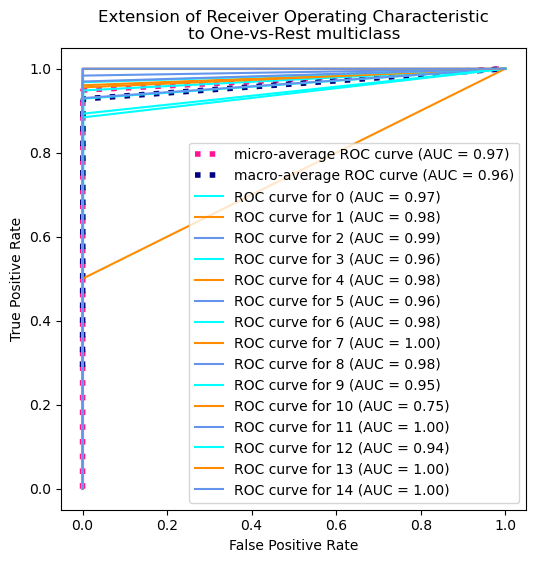

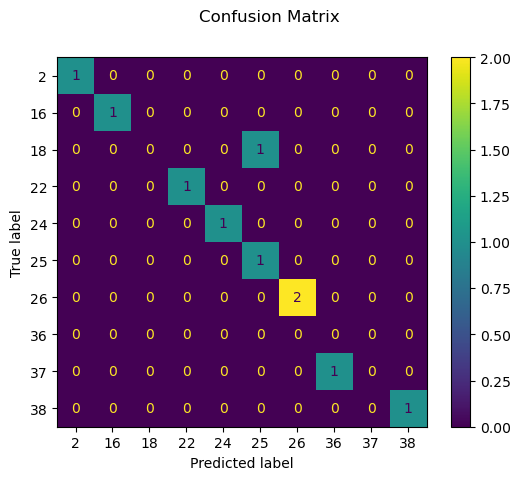

F1 score: 0.9054
Kappa score: 0.9458
Precision value: 0.9180
Recall value: 0.9002
96.94981932640076


In [40]:
#result_after_pre = result_after_pre.drop(columns = "Descrição_Carga")
#x_train1, x_test1 , y_train, y_test = split_dta (result_after_pre)
import time
start = time.time()
#y_pred, y_proba, clf = classifer_fun(x_train, x_test , y_train, y_test)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)
marco_micro(y_train, y_proba, y_test)
conf_matrix (y_test, y_pred)
kappa_f1_recall(y_test, y_pred)
end = time.time()
print(end - start)
with open('DecisionTreeClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)
with open('DecisionTree_for_lessfeatures.pkl','wb') as f:
    pickle.dump(clf,f)

total test case: 17503
total true case: 15718
total False case: 1785
Actual first 10 cases [20 60 25  2 60 37 56 25 46 26]
Predicted first 10 cases [20 60 25  2 60 37 56 25 46 26]
Accuracy = 0.898


In [20]:
with open('DecisionTreeClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

# load
with open('DecisionTreeClassifier.pkl', 'rb') as f:
    clf2 = pickle.load(f)
y_pred = clf2.predict(x_test)
y_proba = clf2.predict_proba(x_test)
metircs (y_pred,y_test)

total test case: 9521
total true case: 8988
total False case: 533
Actual first 10 cases [36 31 18 17  8 30 31 50 50 31]
Predicted first 10 cases [36 31 18 17  8 30 31 50 50 31]
Accuracy = 0.944


In [66]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)

total test case: 139717
total true case: 139717
total False case: 0
Actual first 10 cases [29 23  0 50 27 20 27 28  0  0]
Predicted first 10 cases [29 23  0 50 27 20 27 28  0  0]
Accuracy = 1.000


In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)
metircs (y_pred,y_test)
import pickle

# save
with open('DecisionTreeClassifier.pkl','wb') as f:
    pickle.dump(clf,f)

# load
with open('DecisionTreeClassifier.pkl', 'rb') as f:
    clf2 = pickle.load(f)

total test case: 9521
total true case: 8426
total False case: 1095
Actual first 10 cases [36 31 18 17  8 30 31 50 50 31]
Predicted first 10 cases [36 31 18 17  8 30 31 22 50 31]
Accuracy = 0.885
